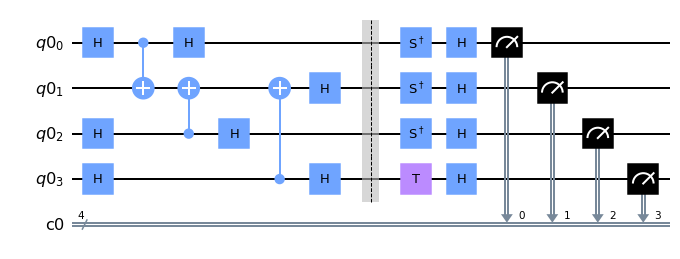

In [1]:
from qiskit import *
qr = QuantumRegister(4)
cr = ClassicalRegister(4)
yyyb = QuantumCircuit(qr, cr)
%matplotlib inline
yyyb.h(qr[0])
yyyb.h(qr[2])
yyyb.h(qr[3])
yyyb.cx(qr[0],qr[1])
yyyb.h(qr[0])
yyyb.cx(qr[2],qr[1])
yyyb.h(qr[2])
yyyb.cx(qr[3],qr[1])
yyyb.h(qr[3])
yyyb.h(qr[1])

yyyb.barrier(qr)

yyyb.sdg(qr[0])
yyyb.sdg(qr[1])
yyyb.sdg(qr[2])
yyyb.h(qr[0])
yyyb.h(qr[1])
yyyb.h(qr[2])
yyyb.t(qr[3])
yyyb.h(qr[3])
yyyb.measure(qr, cr)
yyyb.draw(output='mpl')

In [2]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_athens')
job = execute(yyyb, backend=qcomp,shots = 8192)
from qiskit.tools.monitor import job_monitor

In [3]:
job_monitor(job)

Job Status: job has successfully run


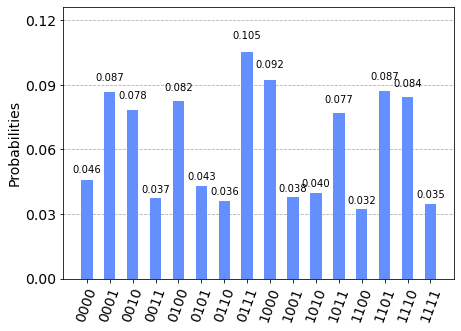

In [4]:
result = job.result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(yyyb))

In [5]:
print((result.get_counts(yyyb)['0000']
     +result.get_counts(yyyb)['0011']
     +result.get_counts(yyyb)['0101']
     +result.get_counts(yyyb)['0110']
     +result.get_counts(yyyb)['1001']
     +result.get_counts(yyyb)['1010']
     +result.get_counts(yyyb)['1100']
     +result.get_counts(yyyb)['1111']
       
    -(result.get_counts(yyyb)['0001']
     +result.get_counts(yyyb)['0010']
     +result.get_counts(yyyb)['0100']
     +result.get_counts(yyyb)['0111']
     +result.get_counts(yyyb)['1000']
     +result.get_counts(yyyb)['1011']
     +result.get_counts(yyyb)['1101']
     +result.get_counts(yyyb)['1110'])
      )/8192)

-0.38623046875
